In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

file_path = "../Excelfil.xlsx"

#Leser data fra den rensa excel filen
data = pd.read_excel(file_path)
    
print(data.head())



#Konverterer tiden
data["referenceTime"]=pd.to_datetime(data["referenceTime"])
data["timeOffset"]=pd.to_timedelta(data["timeOffset"])
data["justertTid"]=data["referenceTime"]-data["timeOffset"]

#Filtrer temperatur, nedbør og snømengder

temp_data=data[data["elementId"]=="mean(air_temperature P1D)"]
nedbør_data=data[data["elementId"]=="sum(precipitation_amount P1D)"]



#Henter ut verdiene

temperatur=temp_data["value"].values
temp_tider=temp_data["justertTid"].values

nedbør=nedbør_data["value"].values
nedbør_tider=nedbør_data["justertTid"].values


#Korrelasjon mellom Temperaturen og nedbøren

sammenslått_data=pd.merge(temp_data.groupby('justertTid')['value'].mean().reset_index(),
                          nedbør_data.groupby('justertTid')['value'].sum().reset_index(),
                          on="justertTid",how="inner",suffixes=("_Temp","_Nedbør"))   #brukte chat

temp_daglig = temp_data.groupby(pd.to_datetime(temp_data['justertTid']).dt.date)['value'].mean()
nedbør_daglig = nedbør_data.groupby(pd.to_datetime(nedbør_data['justertTid']).dt.date)['value'].mean()

# Korrelasjon på daglig basis
korrelasjon = temp_daglig.corr(nedbør_daglig)
print(f"korrelasjonen mellom temperaturen og nedbøren er:{korrelasjon:.2f}")

if korrelasjon>=0.5:
    print("det er stor sammenheng mellom nedbør og temperatur")
elif 0<=korrelasjon<0.5:
    print("det er liten sammenheng mellom nedbør og temperatur")
         


#Nedbør
gjennomsnitts_nedbør=np.mean(nedbør)
median_nedbør=np.median(nedbør)
standardavvik_nedbør=np.std(nedbør)

#Temperatur
gjennomsnitts_temp=np.mean(temperatur)
median_temp=np.median(temperatur)
standardavvik_temp=np.std(temperatur)




   Unnamed: 0                      elementId  value timeOffset  qualityCode  \
0           1  sum(precipitation_amount P1D)    2.3       PT6H            2   
1           2  sum(precipitation_amount P1D)    1.1      PT18H            2   
2           3  sum(precipitation_amount P1D)   10.6       PT6H            2   
3           4  sum(precipitation_amount P1D)    0.4      PT18H            2   
4           5  sum(precipitation_amount P1D)    1.5       PT6H            0   

              referenceTime   sourceId  
0  2012-12-31T00:00:00.000Z  SN39210:0  
1  2013-01-01T00:00:00.000Z  SN39210:0  
2  2013-01-01T00:00:00.000Z  SN39210:0  
3  2013-01-02T00:00:00.000Z  SN39210:0  
4  2013-01-02T00:00:00.000Z  SN39210:0  
korrelasjonen mellom temperaturen og nedbøren er:0.06
det er liten sammenheng mellom nedbør og temperatur


Gjennomsnittstemperaturen er: 6.25 °C
Median temperaturen er: 5.9 °C
Standardavviket til temperaturen er: 7 °C


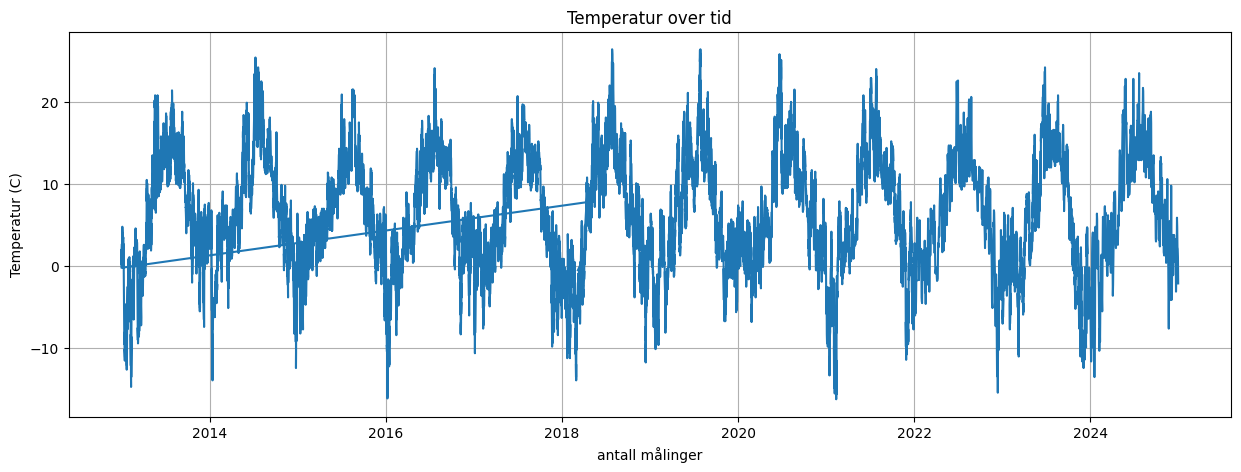

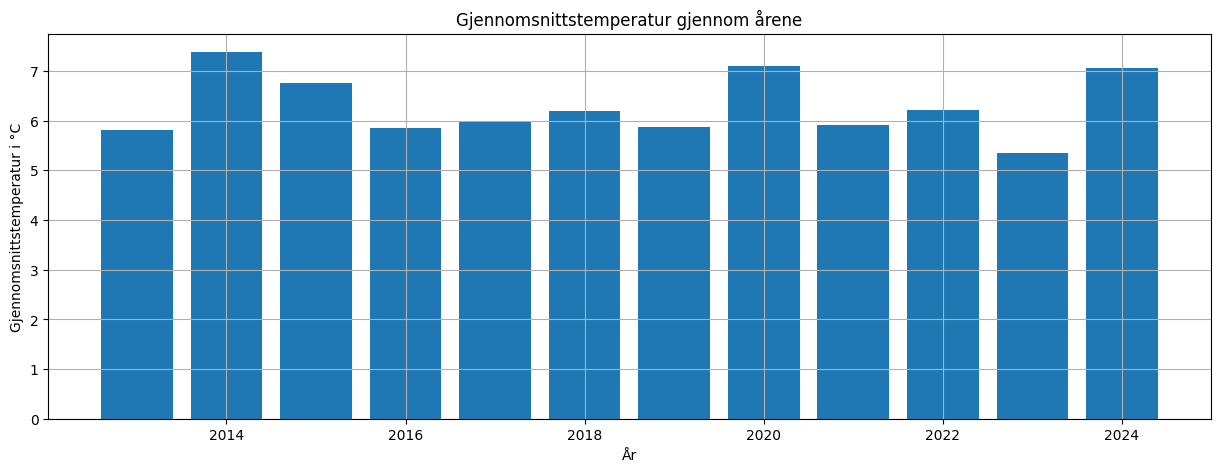

In [19]:
def plot_miljøvalg():
    valg=input("Vil du se på graf for temperatur eller nedbør eller begge?").lower()
    if valg=="temperatur":
        plt.figure(figsize=(15,5))
        plt.plot(temp_tider,temperatur) 
        plt.title("Temperatur over tid")
        plt.xlabel("antall målinger")
        plt.ylabel("Temperatur (C)")
        plt.grid(True)
        plt.show
        temp_årlig = temp_data.groupby(pd.to_datetime(temp_data['justertTid']).dt.year)['value'].mean()
        temp_årlig_uten_2012=temp_årlig[1:]
        plt.figure(figsize=(15,5))
        plt.title("Gjennomsnittstemperatur gjennom årene")
        plt.xlabel("År")
        plt.ylabel("Gjennomsnittstemperatur i °C")
        plt.grid(True)
        plt.bar(temp_årlig_uten_2012.index,temp_årlig_uten_2012.values)
        plt.show
        print("Gjennomsnittstemperaturen er:",round(gjennomsnitts_temp,2),"°C")
        print("Median temperaturen er:",round(median_temp,2),"°C")
        print("Standardavviket til temperaturen er:",round(standardavvik_temp),"°C")

    elif valg=="nedbør":
        plt.figure(figsize=(15,5))
        plt.plot(nedbør_tider,nedbør)  
        plt.title("Nedbørsdata over tid")
        plt.xlabel("antall målinger")
        plt.ylabel("Nedbør (mm)")
        plt.grid(True)
        plt.show
        print("Gjennomsnittsnedbøren er:",round(gjennomsnitts_nedbør,2),"mm")
        print("Median nedbøren er:",round(median_nedbør,2),"mm")
        print("Standardavviket til nedbøren er:",round(standardavvik_nedbør),"mm")
    elif valg=="begge":
        sammenslått_data['år'] = sammenslått_data['justertTid'].dt.year 
        sns.lmplot(data=sammenslått_data.sample(100),x="value_Temp",y="value_Nedbør",hue="år")
    else:
        raise ValueError("Ugyldig valg, velg enten `temperatur´ eller `nedbør´")
    
plot_miljøvalg()

In [6]:
"""
snømengder_data=data[data["elementId"]=="surface_snow_thickness"]
"""


"""
snømengder=snømengder_data["value"].values
snømengder_tider=snømengder_data["justertTid"].values
"""


"""
#Snø
gjennomsnitts_snø=np.mean(snømengder)
median_snø=np.median(snømengder)
standardavvik_snø=np.std(snømengder)
"""

"""
plt.figure(figsize=(15,5))
plt.plot(snømengder_tider,snømengder)
plt.title("snømengde over tid")
plt.xlabel("antall målinger")
plt.ylabel("snømengde (cm)")
plt.grid(True)

plt.show()

print("Gjennomsnittssnømengden er:",round(gjennomsnitts_snø,2),"cm")
print("Median snømengden er:",round(median_snø,2),"cm")
print("Standardavviket til snømengden er:",round(standardavvik_snø),"cm")
"""

'\nplt.figure(figsize=(15,5))\nplt.plot(snømengder_tider,snømengder)\nplt.title("snømengde over tid")\nplt.xlabel("antall målinger")\nplt.ylabel("snømengde (cm)")\nplt.grid(True)\n\nplt.show()\n\nprint("Gjennomsnittssnømengden er:",round(gjennomsnitts_snø,2),"cm")\nprint("Median snømengden er:",round(median_snø,2),"cm")\nprint("Standardavviket til snømengden er:",round(standardavvik_snø),"cm")\n'